In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
data = pd.read_csv("Boston_Housing.csv")
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
print(data.shape)

(506, 14)


In [4]:
print(data.dtypes)

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
MEDV       float64
dtype: object


In [5]:
print(data.isnull().sum())

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
MEDV       0
dtype: int64


In [6]:
print(data.describe())

             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio           b  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [7]:
X = data.loc[: , data.columns != 'MEDV']
y = data.loc[: , data.columns == 'MEDV']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [9]:
m = MinMaxScaler()
m.fit(X_train)

MinMaxScaler()

In [10]:
X_train = m.transform(X_train)
X_test = m.transform(X_test)

In [11]:
model = Sequential()
model.add(Dense(128, input_shape=(13, ), activation='relu', name='dense_1'))
model.add(Dense(64, activation='relu', name='dense_2'))
model.add(Dense(1, activation='linear', name='dense_output'))

In [12]:
model.compile(optimizer='adam', loss='mse', metrics='mae')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               1792      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_output (Dense)        (None, 1)                 65        
                                                                 
Total params: 10113 (39.50 KB)
Trainable params: 10113 (39.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.05, verbose=1)

Epoch 1/100
11/11 [==============================] - 1s 18ms/step - loss: 576.2875 - mae: 22.1015 - val_loss: 491.3259 - val_mae: 21.4702
Epoch 2/100
11/11 [==============================] - 0s 5ms/step - loss: 533.2167 - mae: 21.0370 - val_loss: 442.3090 - val_mae: 20.2636
Epoch 3/100
11/11 [==============================] - 0s 5ms/step - loss: 474.1973 - mae: 19.5007 - val_loss: 369.0867 - val_mae: 18.2992
Epoch 4/100
11/11 [==============================] - 0s 4ms/step - loss: 389.6604 - mae: 17.0688 - val_loss: 267.4826 - val_mae: 15.1089
Epoch 5/100
11/11 [==============================] - 0s 4ms/step - loss: 282.0655 - mae: 13.7697 - val_loss: 156.5427 - val_mae: 11.1140
Epoch 6/100
11/11 [==============================] - 0s 4ms/step - loss: 183.6434 - mae: 10.6588 - val_loss: 82.2265 - val_mae: 7.5193
Epoch 7/100
11/11 [==============================] - 0s 5ms/step - loss: 137.9521 - mae: 9.0294 - val_loss: 63.6987 - val_mae: 6.2869
Epoch 8/100
11/11 [==========================

In [14]:
mse_t, mae_t = model.evaluate(X_test, y_test)

print("MSE: ", mse_t)
print("MAE: ",mae_t)

5/5 [==============================] - 0s 2ms/step - loss: 13.6859 - mae: 2.2811
MSE:  13.685914993286133
MAE:  2.2810585498809814


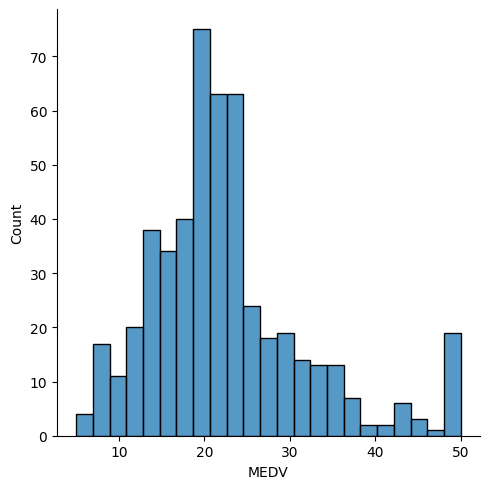

In [15]:
sns.displot(data.MEDV)

<Axes: >

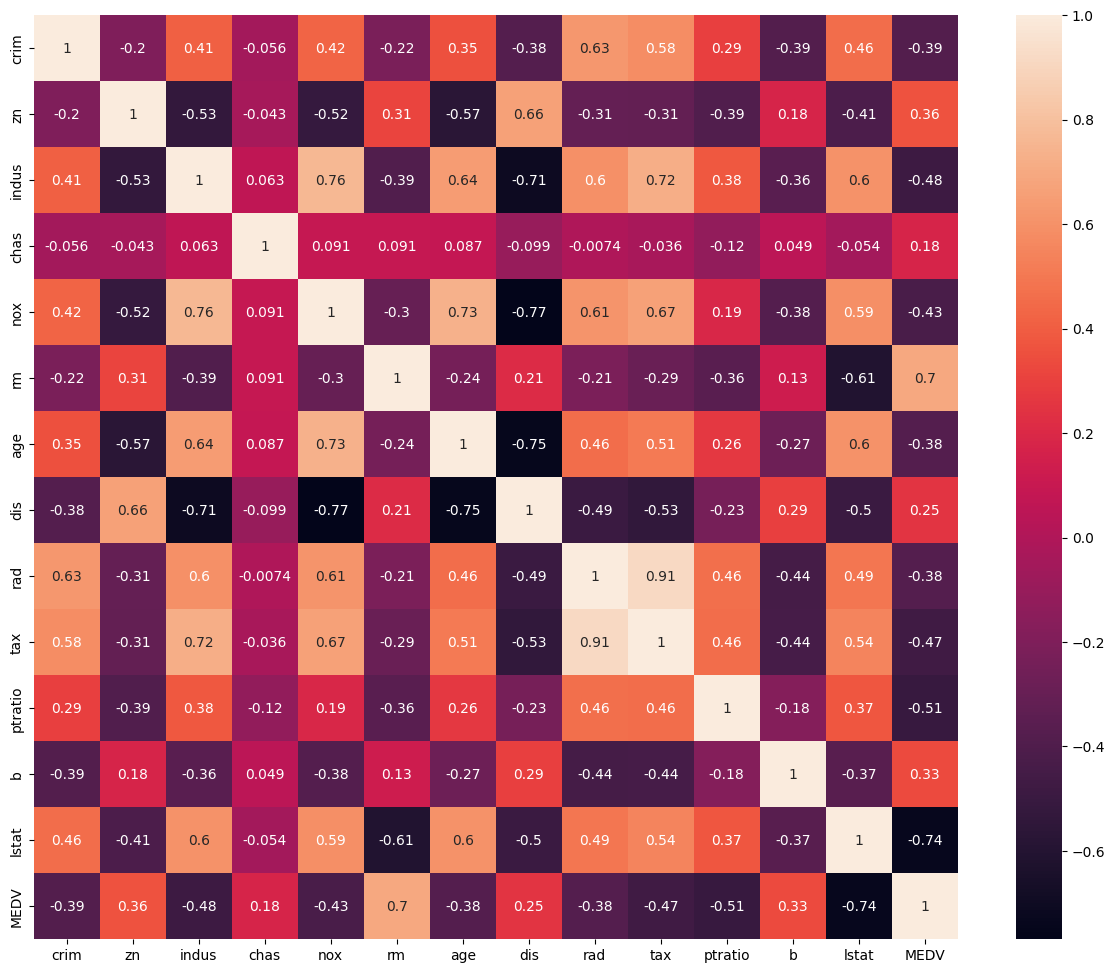

In [16]:
correlation = data.corr()
correlation.loc['MEDV']
fig, axes = plt.subplots(figsize=(15,12))
sns.heatmap(correlation, square=True, annot=True)

In [17]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score: ", r2)
print("RMSE: ", rmse)

5/5 [==============================] - 0s 1ms/step
R2 Score:  0.8377803139580996
RMSE:  3.699447689701956
